In [1]:
import pandas as pd
import numpy as np


from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks 


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
#model = DecisionTreeRegressor()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [2]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
targets = pd.read_csv('files_for_lab/target.csv')
data = pd.concat([numerical, categorical, targets], axis = 1)

In [3]:
data.shape

(95412, 339)

In [4]:
data.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0


In [5]:
(data.dtypes==object).value_counts()

False    332
True       7
dtype: int64

In [6]:
data_cat=data.select_dtypes(include=object)
data_cat

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S
...,...,...,...,...,...,...,...
95407,other,H,M,L,G,C,C
95408,TX,H,M,L,F,A,C
95409,MI,H,M,L,E,B,C
95410,CA,H,F,L,F,A,C


In [7]:
null_values=data.isna().sum()

In [8]:
null_values.sort_index()

AC1         0
AC2         0
ADI         0
AFC1        0
AFC2        0
           ..
VOC2        0
VOC3        0
WEALTH1     0
WEALTH2     0
WWIIVETS    0
Length: 339, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 339 entries, TCODE to TARGET_D
dtypes: float64(10), int64(322), object(7)
memory usage: 246.8+ MB


In [10]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

0    90569
1     4843
Name: TARGET_B, dtype: int64


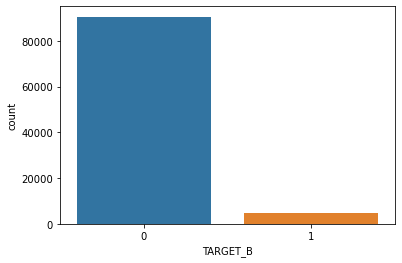

In [11]:
count_classes = data['TARGET_B'].value_counts()
print(count_classes)
sns.countplot(x ='TARGET_B', data = data);
plt.show()

In [12]:
X = data.drop(['TARGET_B','TARGET_D'],axis = 1)
y = data['TARGET_B']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14) # default test_size value is .25

In [14]:
X_train_num=X_train.select_dtypes(exclude=object).reset_index(drop=True)
X_train_cat=X_train.select_dtypes(include=object).reset_index(drop=True)
X_test_num=X_test.select_dtypes(exclude=object).reset_index(drop=True)
X_test_cat=X_test.select_dtypes(include=object).reset_index(drop=True)

In [15]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [16]:
X_test_num.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,1,76.000000,6,7,1,0,43,28,41,12,...,22,5,93,6,88,3,95,11,86,9
1,1,61.000000,5,9,0,0,53,9,71,5,...,37,1,89,10,95,12,95,12,89,10
2,0,61.611649,5,9,0,0,34,45,40,16,...,0,2,95,7,95,12,96,1,95,7
3,0,69.000000,5,6,2,0,26,44,17,3,...,29,6,92,1,95,2,96,1,92,1
4,0,40.000000,6,9,0,0,40,47,10,10,...,58,1,93,7,96,2,96,2,91,3


In [17]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_train_cat)

# Here, after applying the encoder the resulting array will have lots of 0's. When this happens, by default 
# sklearn returns a new type of variable called "np.sparse_array". This new type of variable saves a lot of
# memory because it only stores the location of the non 0 values for each row. However, we can't visualize it
# To avoid this, we need to use .toarray()
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

# Here, the encoder will automatically assign new columns names based on the possible values of each column as
# "column_name" + "_" + "value". Those values were NOT PRESENT in the original categoricals_train df. Therefore,
# we can't simply add the option "columns = categoricals_train df" because we will have a missmatch. However,
# the new column names are stored in the encoder and we can access to them with the method: encoder.get_feature_names_out()
# that we need to assign to the option "columns=" when we define the df.
categoricals_train_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())
categoricals_test_encoded  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())
display(categoricals_train_encoded.head())
display(categoricals_test_encoded.head())

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X_train = pd.concat([X_train_num,categoricals_train_encoded],axis=1)
X_test = pd.concat([X_test_num,categoricals_test_encoded],axis=1)

Apply min max scaler: although it is does not make a difference with RandomForests, it is will not hurt and will come handy with other model types. 

In [19]:
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)
X_train_scaled_np = MinMaxtransformer.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns) #
#X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) #this index part of the code is maintain the 
#index of the original dataframe which will match the y-train index. or ofcourse don't do it and resent the index of the y-train.
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = MinMaxtransformer.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled_np , columns=X_test.columns)
#X_train_scaled_df.head()

Now it is time to oversample the X_train_scaled_df to fix class imbalance:

SMOTE method is used ( supposedly gives better results)

In [20]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point.Given the class imbalance size,5 is used.same random state is used.
sm = SMOTE(random_state=14,k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled_df,y_train)

In [21]:
print('Resampled dataset shape %s' % Counter(y_train_SMOTE))

Resampled dataset shape Counter({0: 67915, 1: 67915})


Now we apply random forest classiffier and fit to the SMOTE upscaled data. 

In [22]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 14)
clf.fit(X_train_SMOTE, y_train_SMOTE)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_SMOTE, y_train_SMOTE)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test_scaled_df, y_test)))

y_pred = clf.predict(X_test_scaled_df)
print("The Precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The Recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))


#display(y_test.value_counts())
#display(confusion_matrix(y_test, y_pred))

The Accuracy for the Random Forest in the TRAIN set is 0.88
The Accuracy for the Random Forest in the TEST  set is 0.84
The Precision in the TEST set is: 0.07
The Recall in the TEST set is: 0.19
The F1 in the TEST set is: 0.10
The Kappa in the TEST set is: 0.03


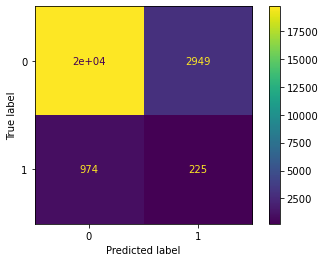

In [24]:
cm_test = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=clf.classes_)
disp.plot()
plt.show()

Cost Matrix (details at: https://github.com/ironhack-edu/data_case_study_1)

The package cost (including the mail cost) is $0.68 per piece mailed.

False positive cost = 2949*0.68 = 2005.32 dollars

The cost of false negative is much higher than the cost of false positive. 

$974/(974+225)*100=81.23  percent %$


In [25]:
cost_of_false_positives = data[data['TARGET_B']==1]['TARGET_D'].sample(974, random_state=14)
#cost_of_false_positives

In [26]:
false_positives_totalcost=cost_of_false_positives.sum()
print ('the potential dollor value of false positives is {:.2f} dollars'.format(false_positives_totalcost))

the potential dollor value of false positives is 15505.45 dollars


Total business loss = 2005+15505=17510 dollars

Given the values above, from a business perspective we would like to reduce the false negative because simply they cost us a lot of money. 
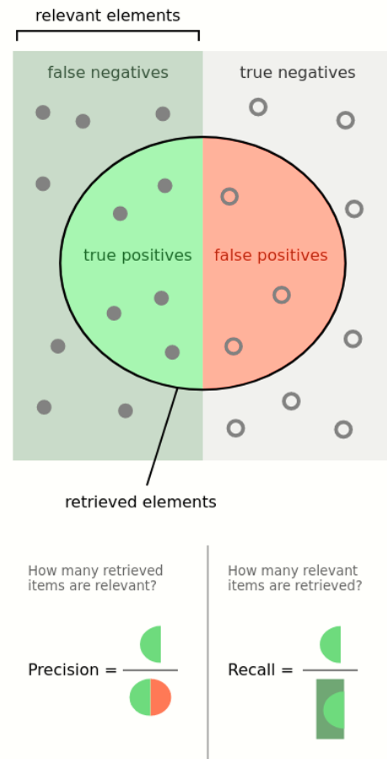

In [27]:
#cost_of_false_positives = data[data['TARGET_B']==1].sample(len(trainset[trainset['TARGET_B']==1]))

In [28]:
#clf = RandomForestClassifier(max_depth=5,
#                             min_samples_split=20,
#                             min_samples_leaf =20,
#                             max_samples=0.8)

cross_val_scores = cross_val_score(clf, X_train_SMOTE, y_train_SMOTE, cv=5)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.88


In [29]:
cross_val_scores

array([0.79787234, 0.89866009, 0.89497902, 0.89681955, 0.89707723])

In [30]:
max_depth_choices= [3,5,15] # None does not set the maximum depth A list of the possible values of max_depth to try
#criterion_choices = ['gini'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,7,10] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,7,10] # A list of the possible values of min_samples_leaf to try       

In [31]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'max_depth': max_depth_choices,
#         'criterion': criterion_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [109]:
# Instantiate the grid search model object

# estimator -> model to optimize 
model = RandomForestClassifier()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
grid_search = GridSearchCV(estimator =model, param_grid = grid, cv = 5,scoring='recall',n_jobs=5) # 3 * 2 * 2 * 2 = 3 * 8 = 24 -> 24*5

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

In [38]:
# and the winner is...
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [39]:
grid_search.best_score_

0.9492012073915923

In [222]:
clf1 = RandomForestClassifier(max_depth=2,
                             min_samples_split=2,
                             min_samples_leaf =2,
                             max_samples=1,
                             random_state = 14)
clf1.fit(X_train_SMOTE, y_train_SMOTE)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf1.score(X_train_SMOTE, y_train_SMOTE)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf1.score(X_test_scaled_df, y_test)))

y_pred1 = clf1.predict(X_test_scaled_df)
print("The Precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred1)))
print("The Recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred1)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred1)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred1)))


#display(y_test.value_counts())
#display(confusion_matrix(y_test, y_pred))

The Accuracy for the Random Forest in the TRAIN set is 0.50
The Accuracy for the Random Forest in the TEST  set is 0.05
The Precision in the TEST set is: 0.05
The Recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.10
The Kappa in the TEST set is: 0.00


In [219]:
filename = "C:/Users/aelarabi/Ironhack/week7/day4/Week7_day4_lab_lab-random-forests/models/clf1.pickle" # Path with filename. you can have the fiel without path. will be created in default folder.
with open(filename, "wb") as file: # creates a binary writable file
        pickle.dump(clf1,file) # saves the scaler to the file created and close it after writing.


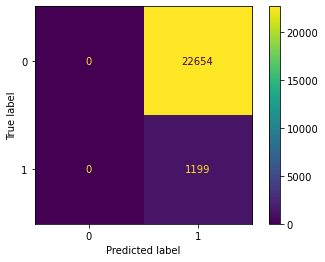

In [220]:
cm_test1 = confusion_matrix(y_test,y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_test1, display_labels=clf1.classes_)
disp1.plot()
plt.show()

TO maximize the recall, the model will predict all the true target_B but th false positive will max out. basically this reduces to mailing everyone out.

In [223]:
cost_of_false_positives_new = data[data['TARGET_B']==1]['TARGET_D'].sample(0, random_state=14)
#cost_of_false_positives

In [224]:
false_positives_totalcost_new=cost_of_false_positives_new.sum()
print ('the potential dollar value of false positives is {:.2f} dollars'.format(false_positives_totalcost_new))

the potential dollar value of false positives is 0.00 dollars


Therefore total cost to the business is : 22654 x 0.68 ( mailing cost) = 15404 dollars.
This presents a net reduction of business loss  = (1-(15404/17510)) x 100 = 12 %

THE END

In [ ]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 
